In [27]:
import pandas as pd
import numpy as np
import json
import folium

In [40]:
park = pd.read_csv("csv/서울시 주요 공원현황.csv", encoding = 'euc-kr')
park.head(1)

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.55014,http://parks.seoul.go.kr/template/sub/namsan.do


In [41]:
park = pd.read_csv("csv/서울시 주요 공원현황.csv", encoding = 'euc-kr')
park = park[['공원명', '면적',  '지역', 'Y좌표(WGS84)', 'X좌표(WGS84)']]
park.rename(columns={'X좌표(WGS84)':'경도', 'Y좌표(WGS84)':'위도'}, inplace=True)
# park["면적"] = park["면적"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
park["면적"] = park["면적"].str.replace("㎡", "", regex=True)
park["면적"] = park["면적"].str.strip()
park = park.dropna(axis=0)
park.head()

,공원명,면적,지역,위도,경도
0,남산도시자연공원,2896887,중구,37.550140,126.990377
1,길동생태공원,80683,강동구,37.540394,127.154779
2,서울대공원,9132690,과천시,37.426449,127.019846
3,서울숲,480994,성동구,37.543072,127.041798
4,월드컵공원,2284085,마포구,37.571805,126.878907


In [42]:
park["면적"] = pd.to_numeric(park["면적"])

In [43]:
park.to_csv("csv/df_park.csv")

In [44]:
park = park.groupby('지역')['면적'].sum().to_frame().reset_index()
park["면적"] = park["면적"] * 0.000001
park["면적"] = round(park["면적"], 2)
park

,지역,면적
0,강남구,3.63
1,강동구,1.53
2,강북구,3.71
3,강서구,2.19
4,과천시,9.13
5,관악구,10.43
6,광진구,0.58
7,구로구,1.62
8,금천구,0.06
9,노원구,12.02


In [54]:
with open('csv/seoul_geo_simple.json', 'rt', encoding='UTF8') as f:
    seoul_geo = json.load(f)

seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [55]:
seoul_geo['features'][0]['properties']

{'code': '11250',
 'name': '강동구',
 'name_eng': 'Gangdong-gu',
 'base_year': '2013'}

In [56]:
park = park.groupby(['지역'])['면적'].sum().to_frame().reset_index()

center = [37.541, 126.986]
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=10)

folium.Choropleth(
    geo_data=seoul_geo,
    data=park, 
    columns=('지역', '면적'), 
    key_on='feature.properties.name',
    fill_color='BuPu',
    legend_name='공원'
).add_to(m)

m

In [63]:
# ! pip install xlrd

In [64]:
seoul = pd.read_excel("csv/Report.xls")
seoul = seoul.iloc[2:,]
seoul = seoul.rename(columns={'자치구':'지역'})
seoul

,기간,지역,면적,면적.1,동,동.1,통,반
2,2020,종로구,23.91,3.95,17,87,279,1475
3,2020,중구,9.96,1.65,15,74,253,1580
4,2020,용산구,21.87,3.61,16,36,354,2581
5,2020,성동구,16.86,2.79,17,17,467,3626
6,2020,광진구,17.06,2.82,15,7,363,2999
7,2020,동대문구,14.22,2.35,14,10,360,2633
8,2020,중랑구,18.5,3.06,16,6,550,4165
9,2020,성북구,24.58,4.06,20,39,464,3729
10,2020,강북구,23.6,3.9,13,4,389,3381
11,2020,도봉구,20.65,3.41,14,4,394,2974


In [65]:
seoul["면적"] = pd.to_numeric(seoul["면적"])

In [76]:
seoul_park = pd.merge(park, seoul, on='지역')
seoul_park = seoul_park[['지역', '면적_x', '면적_y']]
seoul_park

,지역,면적_x,면적_y
0,금천구,0.06,13.02
1,용산구,0.25,21.87
2,영등포구,0.42,24.55
3,동대문구,0.46,14.22
4,광진구,0.58,17.06
5,성동구,0.63,16.86
6,도봉구,1.08,20.65
7,양천구,1.20,17.41
8,성북구,1.20,24.58
9,강동구,1.53,24.59


In [77]:
seoul_park["면적비율"] = seoul_park["면적_x"] / seoul_park["면적_y"] * 100
seoul_park

,지역,면적_x,면적_y,면적비율
0,금천구,0.06,13.02,0.460829
1,용산구,0.25,21.87,1.143118
2,영등포구,0.42,24.55,1.710794
3,동대문구,0.46,14.22,3.234880
4,광진구,0.58,17.06,3.399766
5,성동구,0.63,16.86,3.736655
6,도봉구,1.08,20.65,5.230024
7,양천구,1.20,17.41,6.892590
8,성북구,1.20,24.58,4.882018
9,강동구,1.53,24.59,6.222041


In [78]:
seoul_park.rename(columns={'지역':'구', '면적_x':'공원면적', '면적_y':'구면적'}, inplace=True)
gu_park = seoul_park
gu_park["면적비율"] = round(gu_park["면적비율"], 2)
gu_park.to_csv("df_gu_park.csv")
gu_park

,구,공원면적,구면적,면적비율
0,금천구,0.06,13.02,0.46
1,용산구,0.25,21.87,1.14
2,영등포구,0.42,24.55,1.71
3,동대문구,0.46,14.22,3.23
4,광진구,0.58,17.06,3.40
5,성동구,0.63,16.86,3.74
6,도봉구,1.08,20.65,5.23
7,양천구,1.20,17.41,6.89
8,성북구,1.20,24.58,4.88
9,강동구,1.53,24.59,6.22


## 서울시 구별 구면적대비 공원면적 시각화

In [79]:
center = [37.541, 126.986]
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=10)

folium.Choropleth(
    geo_data=seoul_geo,
    data=gu_park, 
    columns=('구', '면적비율'), 
    key_on='feature.properties.name',
    fill_color='BuPu'
).add_to(m)

m

In [80]:
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl

In [81]:
# deprecate 관련 경고는 무시하도록 설정
import warnings
warnings.filterwarnings('ignore')

In [82]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')    # 설치된 폰트 확인

['C:\\WINDOWS\\Fonts\\ROCCB___.TTF',
 'C:\\Windows\\Fonts\\GILBI___.TTF',
 'C:\\Windows\\Fonts\\STHUPO.TTF',
 'C:\\Windows\\Fonts\\SegoeIcons.ttf',
 'C:\\Windows\\Fonts\\LSANSI.TTF',
 'C:\\WINDOWS\\Fonts\\LeelUIsl.ttf',
 'C:\\WINDOWS\\Fonts\\WINGDNG3.TTF',
 'C:\\Windows\\Fonts\\HTOWERT.TTF',
 'C:\\WINDOWS\\Fonts\\IMPRISHA.TTF',
 'C:\\Windows\\Fonts\\FRAMDCN.TTF',
 'C:\\Windows\\Fonts\\OCRAEXT.TTF',
 'C:\\WINDOWS\\Fonts\\GOTHICI.TTF',
 'C:\\WINDOWS\\Fonts\\ntailub.ttf',
 'C:\\WINDOWS\\Fonts\\constan.ttf',
 'C:\\WINDOWS\\Fonts\\YuGothR.ttc',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\WINDOWS\\Fonts\\ERASBD.TTF',
 'C:\\Windows\\Fonts\\courbd.ttf',
 'C:\\Windows\\Fonts\\LFAXD.TTF',
 'C:\\Windows\\Fonts\\constan.ttf',
 'C:\\WINDOWS\\Fonts\\BOD_BI.TTF',
 'C:\\WINDOWS\\Fonts\\symbol.ttf',
 'C:\\Windows\\Fonts\\BOD_R.TTF',
 'C:\\WINDOWS\\Fonts\\WINGDNG2.TTF',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\Gabriola.ttf',
 'C:\\Windows\\Fonts\\SIMYOU.TTF',
 'C:\\Windows\\Fonts\\Nirma

In [83]:
fontpath = '/usr/share/fonts/NanumGothic.ttf'

mpl.font_manager.FontProperties(fname=fontpath)
# 한글이 안보이면 위 라인을 주석치고 실행했다가
# 다시 주석해제 후 실행

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'구별 공원면적'}>

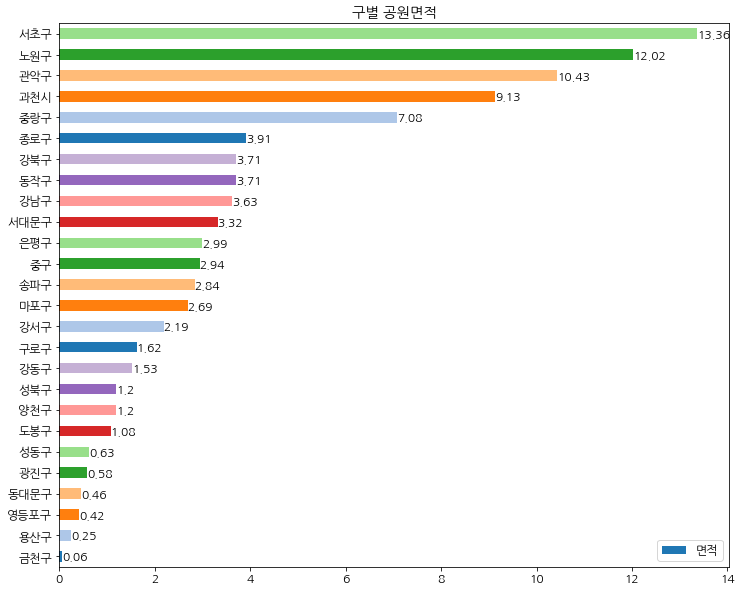

In [84]:
# 구별 공원면적

park = park.sort_values(by=['면적'], ascending=True)
ax1 = park.plot.barh(figsize=(12,10), x='지역', y='면적', xlabel='', ylabel='면적', 
                     color=plt.cm.tab20(np.arange(10)), title='구별 공원면적'
                     )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax1.patches: 
    ax1.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax1

<AxesSubplot:title={'center':'구별 구면적대비 공원면적'}>

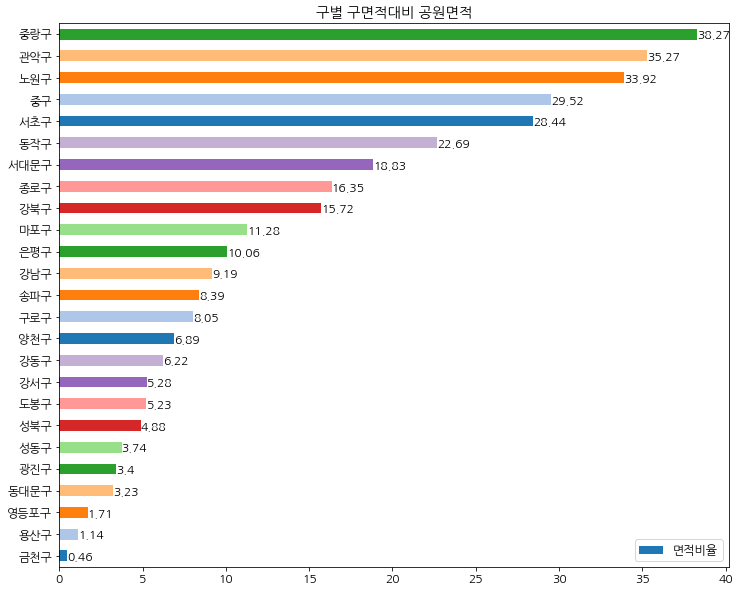

In [85]:
# 구별 구면적대비 공원면적

gu_park = gu_park.sort_values(by=['면적비율'], ascending=True)
ax = gu_park.plot.barh(figsize=(12,10), x='구', y='면적비율', xlabel='', ylabel='면적비율', 
                       color=plt.cm.tab20(np.arange(10)), title='구별 구면적대비 공원면적'
                       )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax.patches: 
    ax.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax